In [1]:
import madmom as mm
import numpy as np
from madmom.features.beats import RNNBeatProcessor
import madmom

In [5]:
act = RNNBeatProcessor()('Not A Romance.wav')

/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [6]:
proc = madmom.features.beats.BeatTrackingProcessor(fps=100)

In [7]:
stuff = proc(act)

In [8]:
intervals = []
for i in range(len(stuff)-1):
    intervals.append(stuff[i+1] - stuff[i])

from collections import Counter
data = Counter(intervals)
qqq = 0
iii = 0
for x in data.most_common():
    qqq += x[0]*x[1]#*x[1]
    iii += x[1]#*x[1]
qqq /= iii
print(60/qqq)

163.990175704


In [9]:
proc1 = RNNBeatProcessor()
probs = proc1('Not A Romance.wav')  

/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [10]:
print(max(probs))
bpm = float(round(60/qqq))
print(bpm)

0.707564
164.0


In [11]:
for i in range(len(probs)):
    if probs[i] >= max(probs): 
        offset = float(i)/float(100)
print(offset)

151.15


In [12]:
h = offset
while h > -10:
    h -= 60.0/bpm-0.003
    print(h)

150.78714634146343
150.42429268292685
150.06143902439027
149.6985853658537
149.3357317073171
148.97287804878053
148.61002439024395
148.24717073170737
147.8843170731708
147.5214634146342
147.15860975609763
146.79575609756105
146.43290243902447
146.0700487804879
145.70719512195132
145.34434146341474
144.98148780487816
144.61863414634158
144.255780487805
143.89292682926842
143.53007317073184
143.16721951219526
142.80436585365868
142.4415121951221
142.07865853658552
141.71580487804894
141.35295121951236
140.99009756097578
140.6272439024392
140.26439024390262
139.90153658536605
139.53868292682947
139.1758292682929
138.8129756097563
138.45012195121973
138.08726829268315
137.72441463414657
137.36156097561
136.9987073170734
136.63585365853683
136.27300000000025
135.91014634146367
135.5472926829271
135.1844390243905
134.82158536585393
134.45873170731736
134.09587804878078
133.7330243902442
133.37017073170762
133.00731707317104
132.64446341463446
132.28160975609788
131.9187560975613
131.55590243

In [13]:
print(stuff[0:10])

[ 0.02  0.39  0.76  1.12  1.48  1.84  2.2   2.57  2.96  3.34]


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


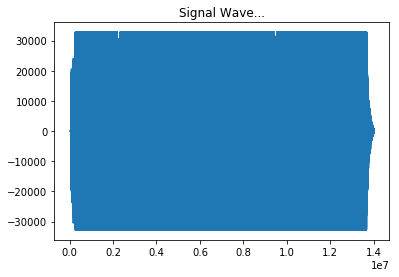

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('Not a Romance.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
#if spf.getnchannels() == 2:
 #   sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

In [15]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [17]:
audio_path = 'Not A Romance.wav'

y, sr = librosa.load(audio_path)

In [18]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

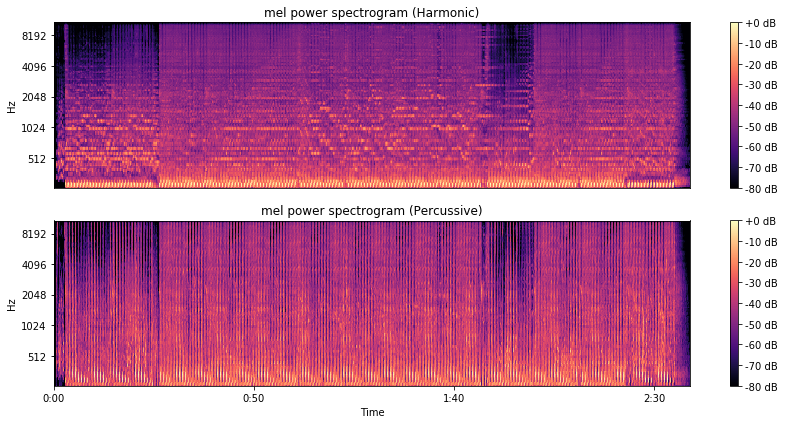

In [19]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

(6848, 128)
6848
1174129.1477 -63703.0795781 587064.573848 555213.034059


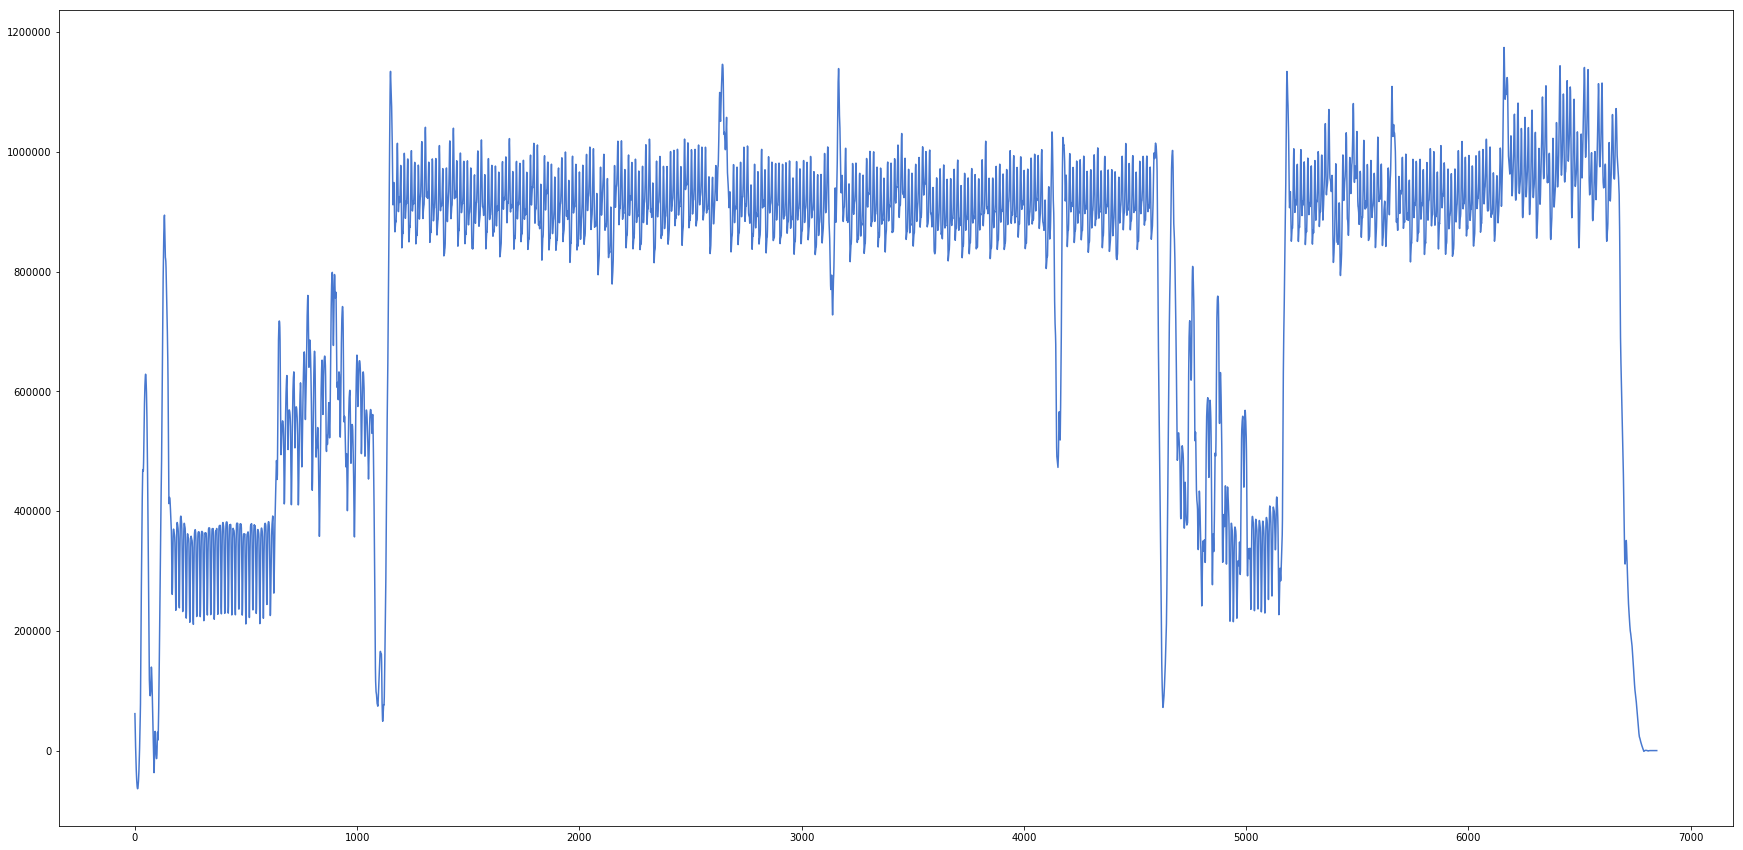

In [43]:
from scipy.signal import savgol_filter

ack = []
pe = log_Sp.transpose()
print(pe.shape)
for i in range(pe.shape[0]):
    ack.append(pe[i][100:])
#print(ack)
sums = []
print(len(ack))
for i in range(len(ack)):
    sums.append(ack[i].sum())
m = min(sums)

for i in range(len(sums)):
    sums[i] -= m
    sums[i] = sums[i]**2
#for i in range(len(sums)):
 #   sums[i] -= sums.sum()/len(sums)

ack2 = savgol_filter(sums, window_length=51, polyorder=2) 
#ack2 = sums

#for i in range(len(sums)):
 #   sums[i] -= m*2
print(max(ack2), min(ack2), max(ack2)/2, (max(ack2)+min(ack2))/2)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(ack2)

plt.show()

In [77]:
from librosa.core import frames_to_time
from statistics import median_low
idea = []

mean_mel = median_low(ack2)
print(mean_mel)
stream_flag = 0
stream = []
ass = []
for lvl in range(len(ack2)):
    if ack2[lvl] > mean_mel and stream_flag == 0:
        stream_flag = 1
        stream.append(lvl)
        ass.append
    elif ack2[lvl] < mean_mel and stream_flag == 1:
        stream_flag = 0
        stream.append(lvl)
        stream = frames_to_time(stream[:])
        print(stream)
        idea.append(stream)
        stream = []
        

for k in idea:
    k[0] = round(time_to_beat(164, 0.20287804878180116, k[0]))
    k[1] = round(time_to_beat(164, 0.20287804878180116, k[1]))
    #print(k)
i = 1
while i < len(idea):
    if idea[i][0] == idea[i-1][1]:
        idea[i-1][1] = idea[i][1]
        idea.pop(i)
    i += 1

for k in idea:
    print(k)
        

893471.59378
[ 3.08825397  3.11147392]
[ 26.56362812  27.12090703]
[ 27.30666667  27.84072562]
[ 28.07292517  28.25868481]
[ 28.28190476  28.58376417]
[ 28.79274376  29.32680272]
[ 29.53578231  29.72154195]
[ 29.7447619   30.06984127]
[ 30.11628118  30.78965986]
[ 30.99863946  31.18439909]
[ 31.25405896  31.53269841]
[ 31.6952381   32.22929705]
[ 32.48471655  32.62403628]
[ 32.67047619  33.01877551]
[ 33.06521542  33.71537415]
[ 33.92435374  34.43519274]
[ 34.66739229  34.82993197]
[ 34.92281179  35.17823129]
[ 35.41043084  35.54975057]
[ 35.61941043  35.92126984]
[ 36.06058957  36.61786848]
[ 36.85006803  37.03582766]
[ 37.12870748  37.36090703]
[ 37.59310658  37.75564626]
[ 37.82530612  38.08072562]
[ 38.33614512  38.84698413]
[ 38.91664399  39.54358277]
[ 39.77578231  39.96154195]
[ 39.9847619   40.30984127]
[ 40.51882086  40.68136054]
[ 40.72780045  41.00643991]
[ 41.23863946  41.77269841]
[ 41.84235828  42.14421769]
[ 42.35319728  42.46929705]
[ 42.7014966  43.2123356]
[ 43.444535

In [78]:
beats_count = frames_to_time(len(ack2))

def time_to_beat(bpm, first_beat, timestamp):
    apprx_beat = (timestamp - first_beat)/(bpm/60.0/16.0)
    #print(apprx_beat, timestamp)
    return apprx_beat
    

In [67]:
idea2 = []

print(idea)
for z in idea:
    stream2 = []
    stream2.append(round(time_to_beat(164, 0.20287804878180116, z[0])))
    stream2.append(round(time_to_beat(164, 0.20287804878180116, z[1])))
    idea2.append(stream2)
    print(stream2, '\n')
                   

[array([ 17.,  17.]), array([ 154.,  158.]), array([ 159.,  162.]), array([ 163.,  164.]), array([ 164.,  166.]), array([ 167.,  170.]), array([ 172.,  173.]), array([ 173.,  175.]), array([ 175.,  179.]), array([ 180.,  181.]), array([ 182.,  183.]), array([ 184.,  187.]), array([ 189.,  190.]), array([ 190.,  192.]), array([ 192.,  196.]), array([ 197.,  200.]), array([ 202.,  203.]), array([ 203.,  205.]), array([ 206.,  207.]), array([ 207.,  209.]), array([ 210.,  213.]), array([ 215.,  216.]), array([ 216.,  218.]), array([ 219.,  220.]), array([ 220.,  222.]), array([ 223.,  226.]), array([ 227.,  230.]), array([ 232.,  233.]), array([ 233.,  235.]), array([ 236.,  237.]), array([ 237.,  239.]), array([ 240.,  243.]), array([ 244.,  246.]), array([ 247.,  247.]), array([ 249.,  252.]), array([ 253.,  254.]), array([ 255.,  256.]), array([ 257.,  258.]), array([ 259.,  260.]), array([ 262.,  263.]), array([ 263.,  263.]), array([ 264.,  265.]), array([ 266.,  269.]), array([ 270.

In [79]:
bpm = 164.0
track_len = (frames_to_time(len(ack2))-0.20287804878180116)/60.0*bpm
print(frames_to_time(len(ack2))-0.20287804878180116)
print(frames_to_time(len(ack2)), track_len)
b = []
stream_flag = 0
for i in range(int(track_len)*16):
    if i == idea[0][0]:
        stream_flag = 1
    if stream_flag == 0:
        b.append('0000')
    elif stream_flag == 1:
        b.append('1000')
    if i == idea[0][1]:
        stream_flag = 0
    
    if i%16 == 0:
        b.append(',')

[ 158.80737138]
[ 159.01024943] [ 434.07348178]


In [80]:
for s in b:
    print(s)

0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
1000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
0000
,
0000
0000